<h1><center>CORONA-VIRUS(COVID-19)</center></h1>

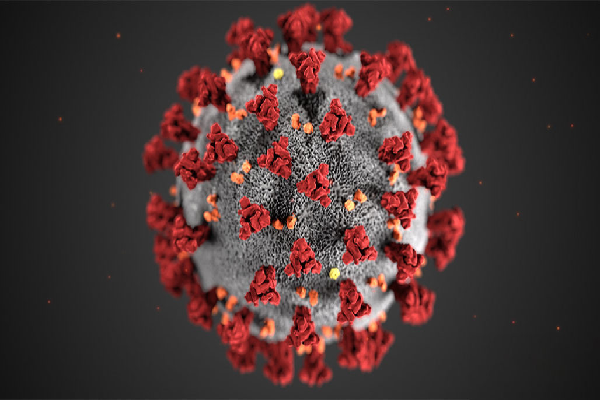

In [61]:
im = PIL.Image.open("images/corona.jpg")
display(im.resize((600,400), 0))

In this notebook I will research on the tracks of spread of novel corona-virus, also known as COVID-19 or SARS-CoV-2. It is contagious respiratory virus that first started in Wuhan in December 2019. On 2/11/2020, the pandemic is offically name COVID-19 by the World Health Organization. At first, It is thought like as others normal virus: H5N1, H5N9,... Many countries in the world are not aware of this pandemic which have failed in control the spreading now. So today I want to research and visualize some information about this pandemic and build a model to predict the X-ray chest of COVID-19's victim. Let's start !

You can find the data here:

- Data update everyday: https://github.com/CSSEGISandData/COVID-19
- Learn more from [WHO](https://www.who.int/emergencies/diseases/novel-coronavirus-2019)
- Learn more from [CDC](https://www.cdc.gov/coronavirus/2019-ncov/)
- Source code is [on my github]()

# Import libary

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import plotly.express as px
import plotly.offline as py
import numpy as np
import cv2
import os
import warnings
import datetime
import operator
import random
import PIL

from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.svm import SVR

%matplotlib inline 
warnings.filterwarnings('ignore')

## Take a look at data

- Last update: 3/27/2020 3:30PM

In [26]:
confirmed_data = pd.read_csv('COVID-19-master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths_data = pd.read_csv('COVID-19-master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recoverd_data = pd.read_csv('COVID-19-master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
age_data = pd.read_csv('coronavirusdataset/COVID-19_Age.csv')

In [27]:
confirmed_data.head()

Province/State Country/Region      Lat     Long  1/22/20  1/23/20  1/24/20  \
0            NaN    Afghanistan  33.0000  65.0000        0        0        0   
1            NaN        Albania  41.1533  20.1683        0        0        0   
2            NaN        Algeria  28.0339   1.6596        0        0        0   
3            NaN        Andorra  42.5063   1.5218        0        0        0   
4            NaN         Angola -11.2027  17.8739        0        0        0   

   1/25/20  1/26/20  1/27/20  ...  3/18/20  3/19/20  3/20/20  3/21/20  \
0        0        0        0  ...       22       22       24       24   
1        0        0        0  ...       59       64       70       76   
2        0        0        0  ...       74       87       90      139   
3        0        0        0  ...       39       53       75       88   
4        0        0        0  ...        0        0        1        2   

   3/22/20  3/23/20  3/24/20  3/25/20  3/26/20  3/27/20  
0       40       40       74       84       94      110  
1       89      104      123      146      174      186  
2      201      230      264      302      367      409  
3      113      133      164      188      224      267  
4        2        3        3        3        4        4  

[5 rows x 70 columns]

In [28]:
cols = confirmed_data.keys()

In [29]:
confirmed = confirmed_data.loc[:, cols[4]:cols[-1]]
deaths = deaths_data.loc[:, cols[4]:cols[-1]]
recovered = recoverd_data.loc[:, cols[4]:cols[-1]]

In [30]:
dates = confirmed.keys()
world_cases = []
total_deaths = []
mortality_rate = []
recovery_rate = []
total_recovered = [] 
total_active = [] 
china_cases = [] 
italy_cases = []
us_cases = [] 
spain_cases = []

for i in dates:
    confirmed_sum = confirmed[i].sum()
    death_sum = deaths[i].sum()
    recovered_sum = recovered[i].sum()
    
    # confirmed, deaths, recovered, and active
    world_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    total_recovered.append(recovered_sum)
    total_active.append(confirmed_sum-death_sum-recovered_sum)
    
    # calculate rates
    mortality_rate.append(death_sum/confirmed_sum)
    recovery_rate.append(recovered_sum/confirmed_sum)

    # case studies 
    china_cases.append(confirmed_data[confirmed_data['Country/Region']=='China'][i].sum())
    italy_cases.append(confirmed_data[confirmed_data['Country/Region']=='Italy'][i].sum())
    us_cases.append(confirmed_data[confirmed_data['Country/Region']=='US'][i].sum())
    spain_cases.append(confirmed_data[confirmed_data['Country/Region']=='Spain'][i].sum())

In [31]:
def daily_increase(data):
    d = [] 
    for i in range(len(data)):
        if i == 0:
            d.append(data[0])
        else:
            d.append(data[i]-data[i-1])
    return d 

world_daily_increase = daily_increase(world_cases)
china_daily_increase = daily_increase(china_cases)
italy_daily_increase = daily_increase(italy_cases)
us_daily_increase = daily_increase(us_cases)
spain_daily_increase = daily_increase(spain_cases)

In [32]:
days_since_1_22 = np.array([i for i in range(len(dates))]).reshape(-1, 1)
world_cases = np.array(world_cases).reshape(-1, 1)
total_deaths = np.array(total_deaths).reshape(-1, 1)
total_recovered = np.array(total_recovered).reshape(-1, 1)

In [33]:
days_in_future = 10
future_forcast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1, 1)
adjusted_dates = future_forcast[:-10]

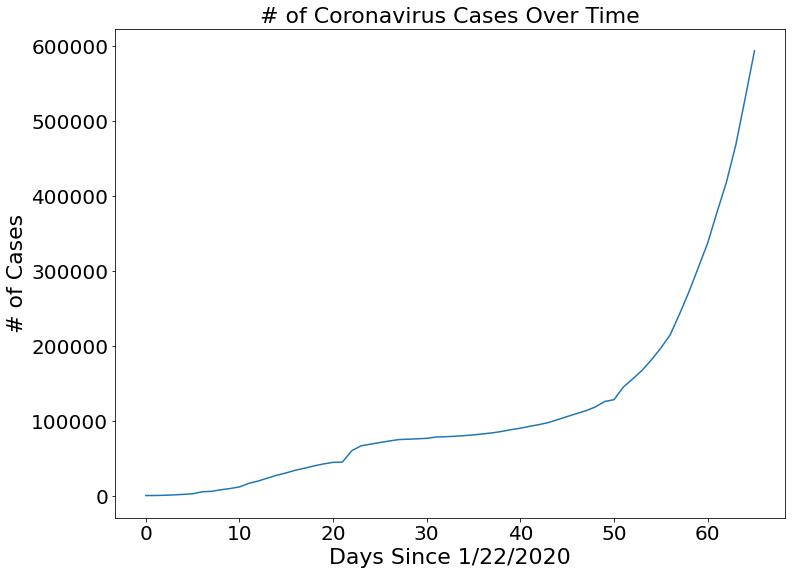

In [34]:
adjusted_dates = adjusted_dates.reshape(1, -1)[0]
plt.figure(figsize=(12, 9))
plt.plot(adjusted_dates, world_cases)
plt.title('# of Coronavirus Cases Over Time', size=22)
plt.xlabel('Days Since 1/22/2020', size=22)
plt.ylabel('# of Cases', size=22)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

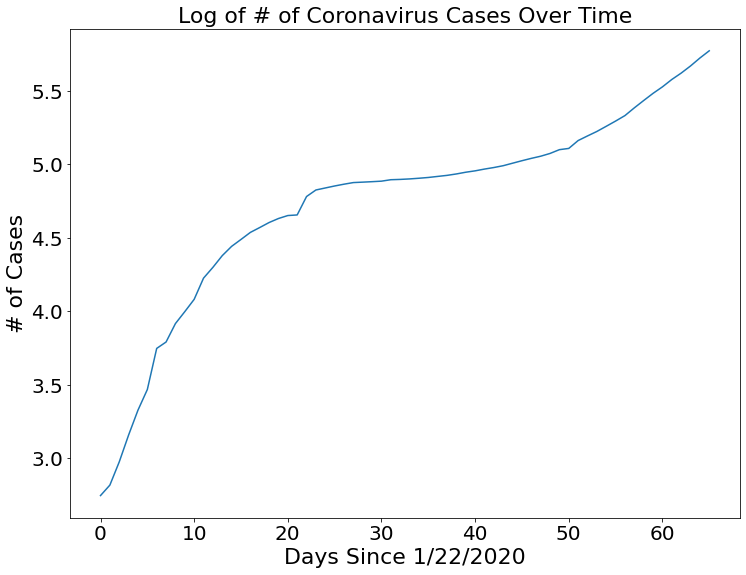

In [35]:
plt.figure(figsize=(12, 9))
plt.plot(adjusted_dates, np.log10(world_cases))
plt.title('Log of # of Coronavirus Cases Over Time', size=22)
plt.xlabel('Days Since 1/22/2020', size=22)
plt.ylabel('# of Cases', size=22)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

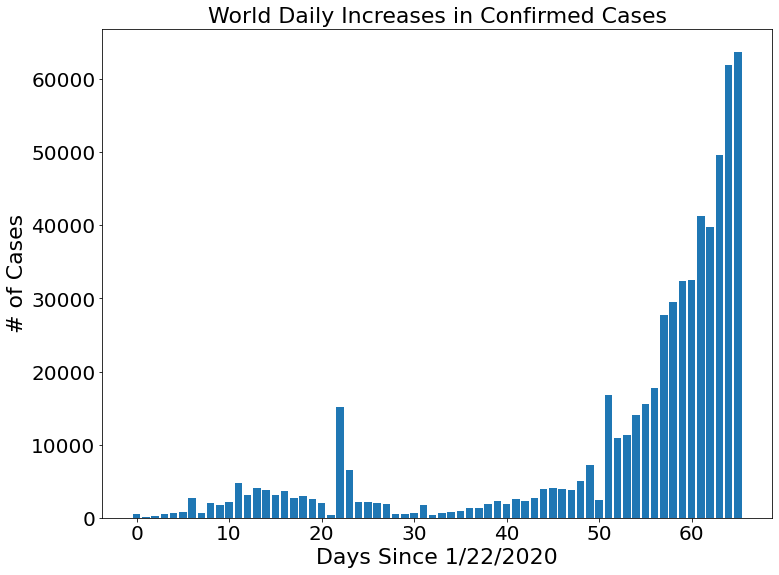

In [36]:
plt.figure(figsize=(12, 9))
plt.bar(adjusted_dates, world_daily_increase)
plt.title('World Daily Increases in Confirmed Cases', size=22)
plt.xlabel('Days Since 1/22/2020', size=22)
plt.ylabel('# of Cases', size=22)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

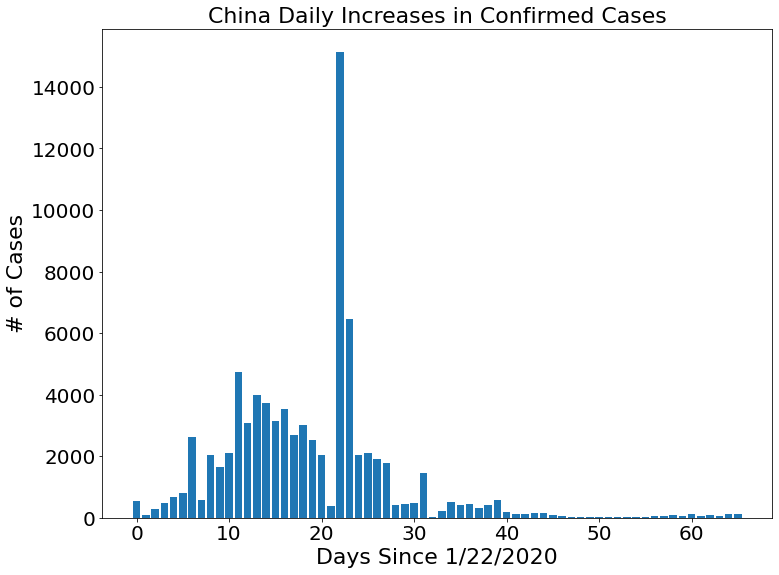

In [37]:
plt.figure(figsize=(12, 9))
plt.bar(adjusted_dates, china_daily_increase)
plt.title('China Daily Increases in Confirmed Cases', size=22)
plt.xlabel('Days Since 1/22/2020', size=22)
plt.ylabel('# of Cases', size=22)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

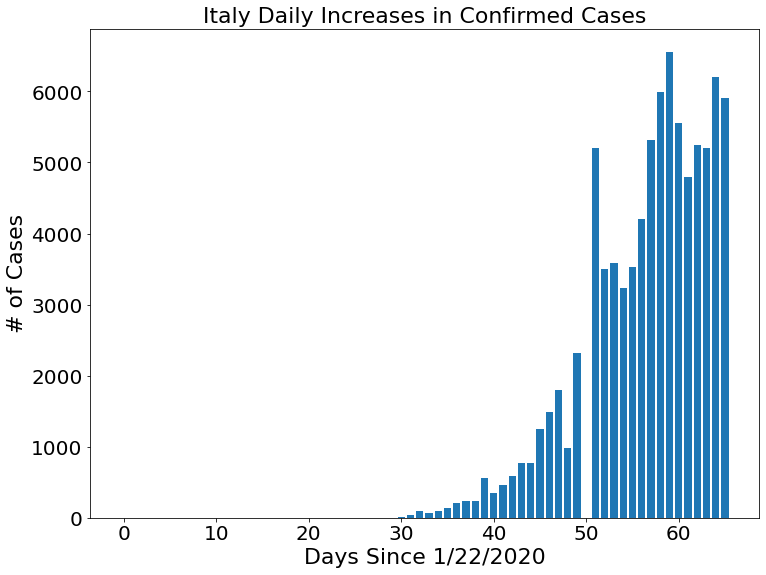

In [38]:
plt.figure(figsize=(12, 9))
plt.bar(adjusted_dates, italy_daily_increase)
plt.title('Italy Daily Increases in Confirmed Cases', size=22)
plt.xlabel('Days Since 1/22/2020', size=22)
plt.ylabel('# of Cases', size=22)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

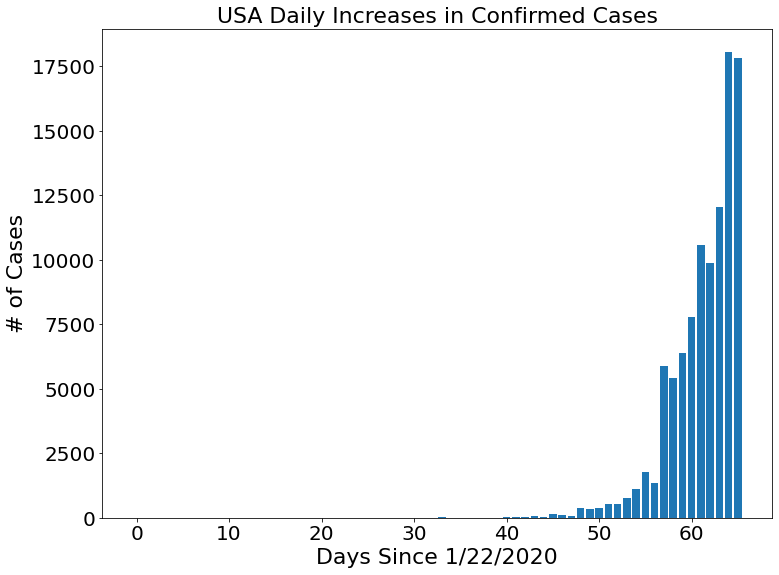

In [39]:
plt.figure(figsize=(12, 9))
plt.bar(adjusted_dates, us_daily_increase)
plt.title('USA Daily Increases in Confirmed Cases', size=22)
plt.xlabel('Days Since 1/22/2020', size=22)
plt.ylabel('# of Cases', size=22)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

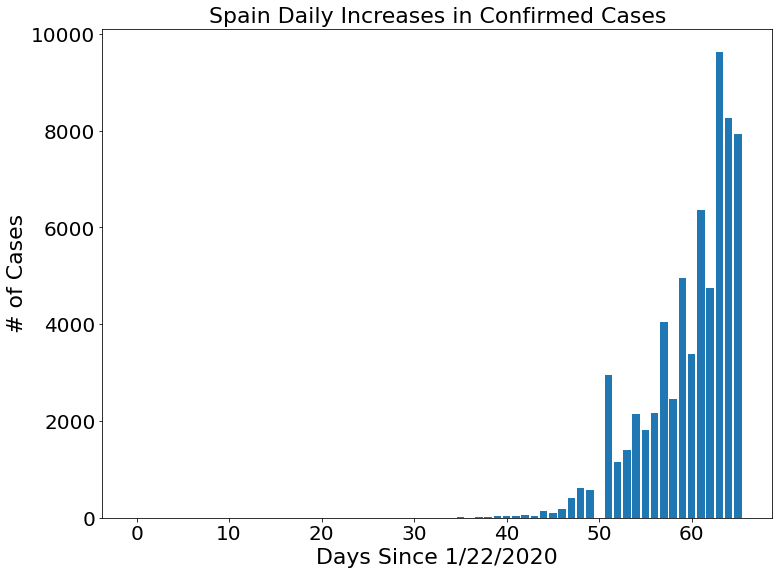

In [40]:
plt.figure(figsize=(12, 9))
plt.bar(adjusted_dates, spain_daily_increase)
plt.title('Spain Daily Increases in Confirmed Cases', size=22)
plt.xlabel('Days Since 1/22/2020', size=22)
plt.ylabel('# of Cases', size=22)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

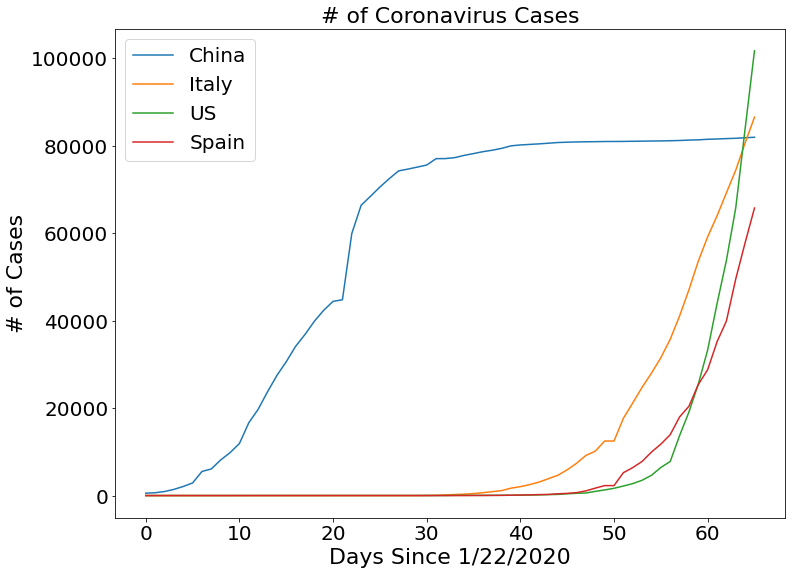

In [41]:
plt.figure(figsize=(12, 9))
plt.plot(adjusted_dates, china_cases)
plt.plot(adjusted_dates, italy_cases)
plt.plot(adjusted_dates, us_cases)
plt.plot(adjusted_dates, spain_cases)
plt.title('# of Coronavirus Cases', size=22)
plt.xlabel('Days Since 1/22/2020', size=22)
plt.ylabel('# of Cases', size=22)
plt.legend(['China', 'Italy', 'US', 'Spain'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [42]:
start = '1/22/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
future_forcast_dates = []
for i in range(len(future_forcast)):
    future_forcast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))

In [43]:
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_1_22, world_cases, test_size=0.05, shuffle=False) 

In [44]:
svm_confirmed = SVR(shrinking=True, kernel='poly',gamma=0.01, epsilon=1,degree=8, C=0.1)
svm_confirmed.fit(X_train_confirmed, y_train_confirmed)
svm_pred = svm_confirmed.predict(future_forcast)

In [45]:
print('SVM future predictions:')
set(zip(future_forcast_dates[-10:], np.round(svm_pred[-10:])))

SVM future predictions:


{('03/28/2020', 647952.0),
 ('03/29/2020', 722249.0),
 ('03/30/2020', 804728.0),
 ('03/31/2020', 896149.0),
 ('04/01/2020', 997331.0),
 ('04/02/2020', 1109152.0),
 ('04/03/2020', 1232560.0),
 ('04/04/2020', 1368567.0),
 ('04/05/2020', 1518260.0),
 ('04/06/2020', 1682804.0)}

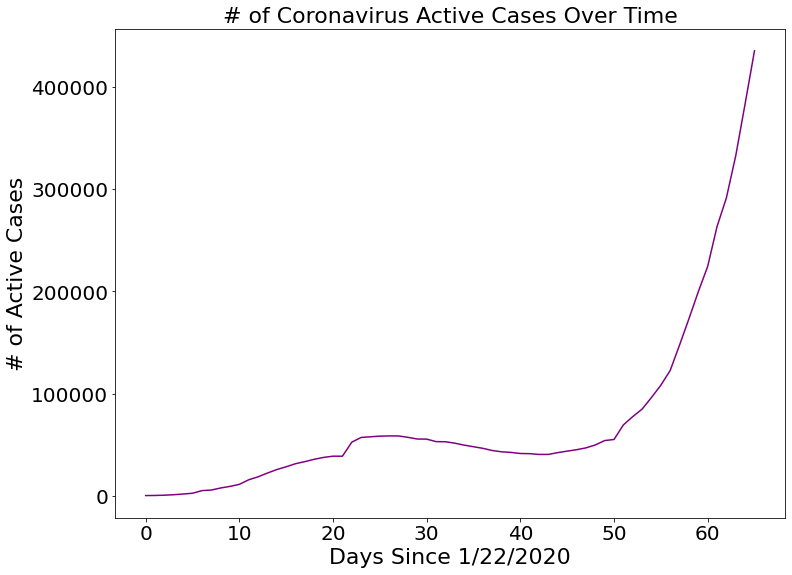

In [46]:
plt.figure(figsize=(12, 9))
plt.plot(adjusted_dates, total_active, color='purple')
plt.title('# of Coronavirus Active Cases Over Time', size=22)
plt.xlabel('Days Since 1/22/2020', size=22)
plt.ylabel('# of Active Cases', size=22)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

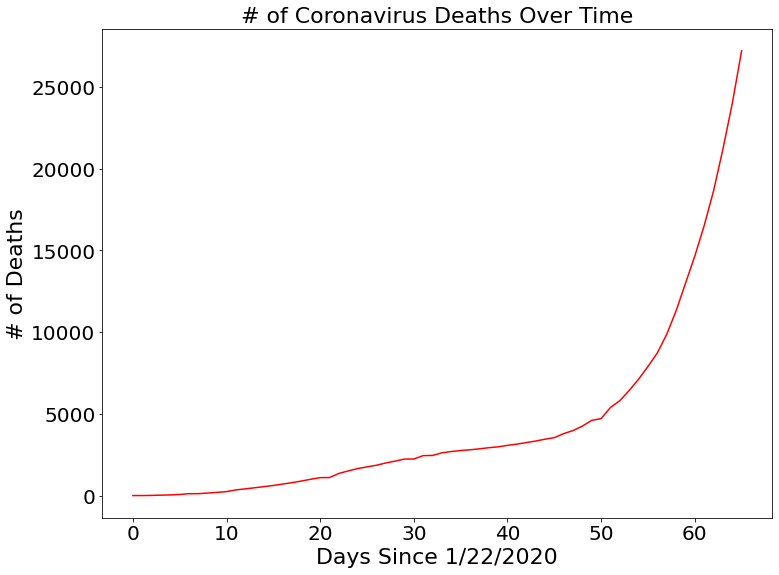

In [47]:
plt.figure(figsize=(12, 9))
plt.plot(adjusted_dates, total_deaths, color='red')
plt.title('# of Coronavirus Deaths Over Time', size=22)
plt.xlabel('Days Since 1/22/2020', size=22)
plt.ylabel('# of Deaths', size=22)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

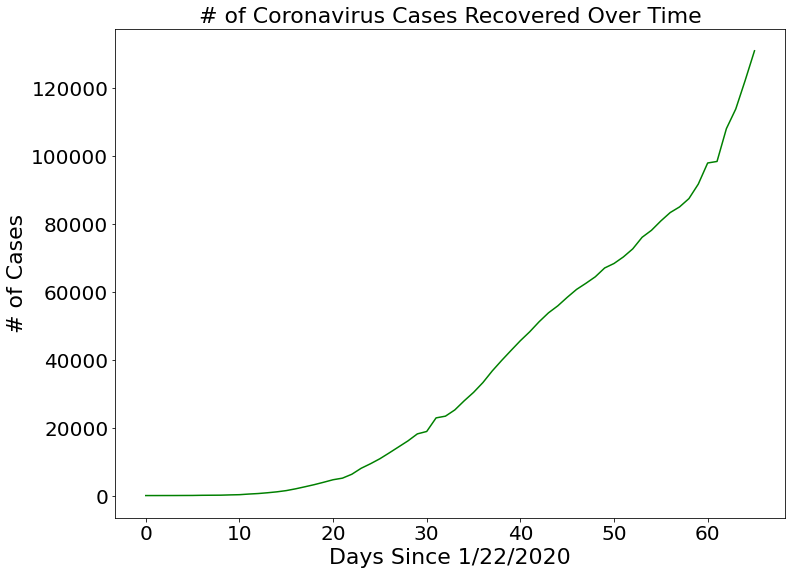

In [48]:
plt.figure(figsize=(12,9))
plt.plot(adjusted_dates, total_recovered, color='green')
plt.title('# of Coronavirus Cases Recovered Over Time', size=22)
plt.xlabel('Days Since 1/22/2020', size=22)
plt.ylabel('# of Cases', size=22)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

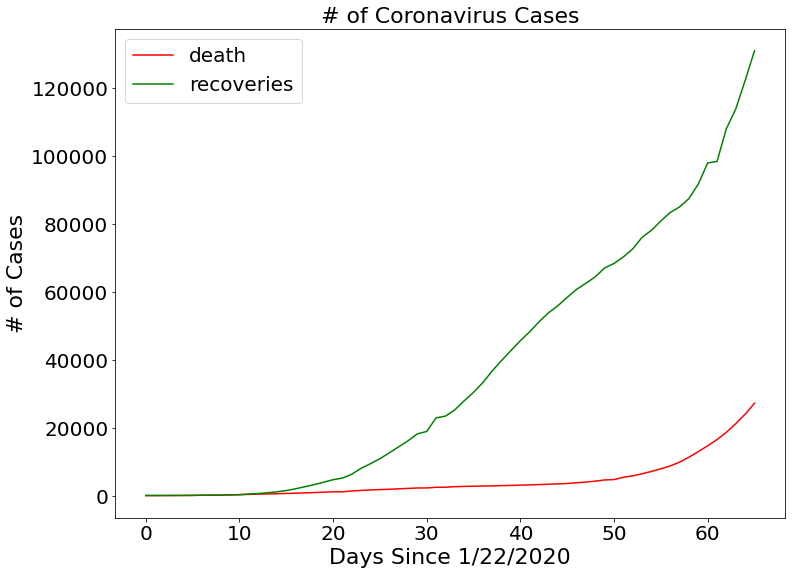

In [49]:
plt.figure(figsize=(12, 9))
plt.plot(adjusted_dates, total_deaths, color='r')
plt.plot(adjusted_dates, total_recovered, color='green')
plt.legend(['death', 'recoveries'], loc='best', fontsize=20)
plt.title('# of Coronavirus Cases', size=22)
plt.xlabel('Days Since 1/22/2020', size=22)
plt.ylabel('# of Cases', size=22)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [50]:
latest_confirmed = confirmed_data[dates[-1]]
latest_deaths = deaths_data[dates[-1]]
latest_recoveries = recoverd_data[dates[-1]]

unique_countries =  list(confirmed_data['Country/Region'].unique())
no_cases = []
country_confirmed_cases = []
for i in unique_countries:
    cases = latest_confirmed[confirmed_data['Country/Region']==i].sum()
    if cases > 0:
        country_confirmed_cases.append(cases)
    else:
        no_cases.append(i)
        
for i in no_cases:
    unique_countries.remove(i)
    
# sort countries by the number of confirmed cases
unique_countries = [k for k, v in sorted(zip(unique_countries, country_confirmed_cases), key=operator.itemgetter(1), reverse=True)]
for i in range(len(unique_countries)):
    country_confirmed_cases[i] = latest_confirmed[confirmed_data['Country/Region']==unique_countries[i]].sum()

In [51]:
# Only show 10 countries with the most confirmed cases, the rest are grouped into the other category
visual_unique_countries = [] 
visual_confirmed_cases = []
others = np.sum(country_confirmed_cases[10:])

for i in range(len(country_confirmed_cases[:10])):
    visual_unique_countries.append(unique_countries[i])
    visual_confirmed_cases.append(country_confirmed_cases[i])
    
visual_unique_countries.append('Others')
visual_confirmed_cases.append(others)

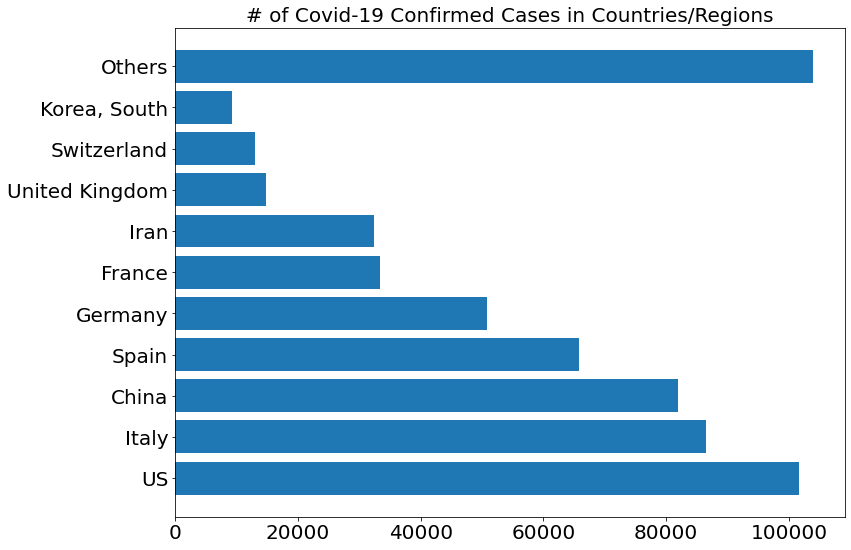

In [52]:
plt.figure(figsize=(12, 9))
plt.barh(visual_unique_countries, visual_confirmed_cases)
plt.title('# of Covid-19 Confirmed Cases in Countries/Regions', size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

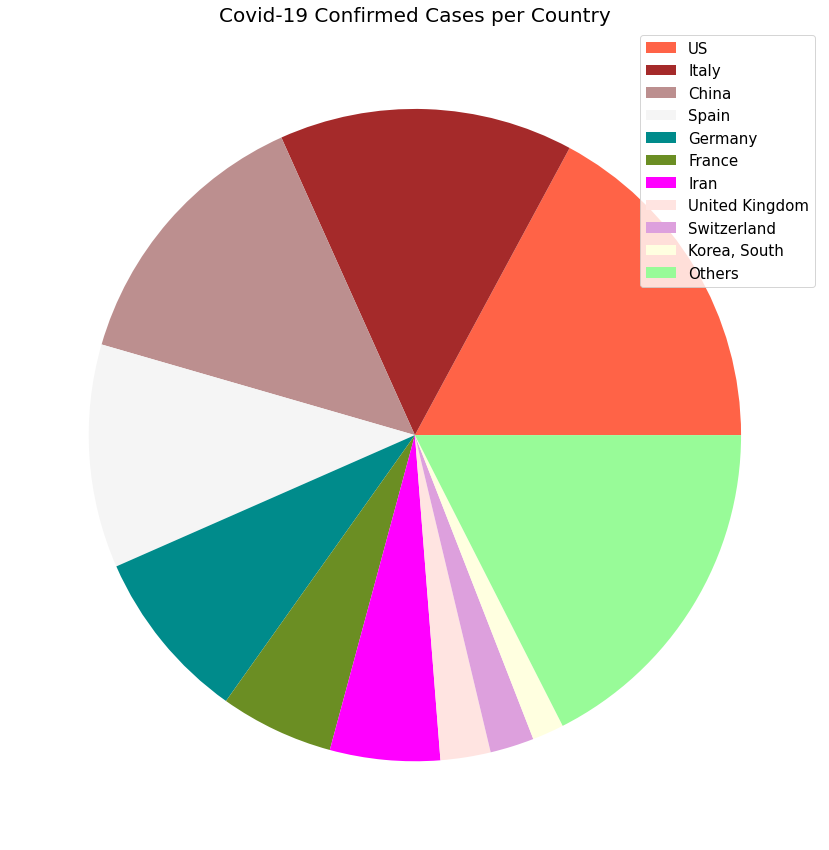

In [53]:
c = random.choices(list(mcolors.CSS4_COLORS.values()),k = len(unique_countries))
plt.figure(figsize=(20,15))
plt.title('Covid-19 Confirmed Cases per Country', size=20)
plt.pie(visual_confirmed_cases, colors=c)
plt.legend(visual_unique_countries, loc='best', fontsize=15)
plt.show()

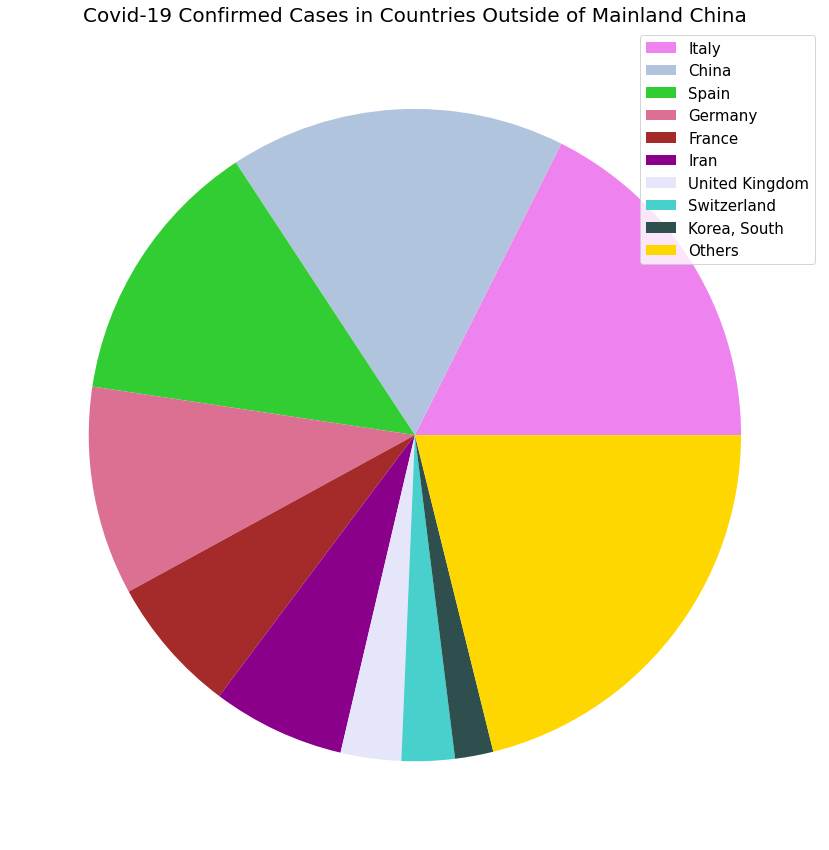

In [54]:
c = random.choices(list(mcolors.CSS4_COLORS.values()),k = len(unique_countries))
plt.figure(figsize=(20,15))
plt.title('Covid-19 Confirmed Cases in Countries Outside of Mainland China', size=20)
plt.pie(visual_confirmed_cases[1:], colors=c)
plt.legend(visual_unique_countries[1:], loc='best', fontsize=15)
plt.show()

# Another dataset

In [55]:
case_data = pd.read_csv('coronavirusdataset/Case.csv')
patient_info_data = pd.read_csv('coronavirusdataset/PatientInfo.csv')
route_data = pd.read_csv('coronavirusdataset/TimeGender.csv')
gender = pd.read_csv('coronavirusdataset/TimeGender.csv')

In [56]:
bins = [0, 9, 19, 29, 39, 49, 59, 69, 79, 89, 99, 109, 119, 129]
labels=['0-9','10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99', '100-109', '110-119', '120-129']
age_data['range_age'] = pd.cut(age_data['Age_end'], bins=bins, labels=labels, include_lowest=True)

In [57]:
#italy_data = age_data[age_data['Country'] == 'Italy'][['Positive', 'range_age', 'Country']]

## About Age

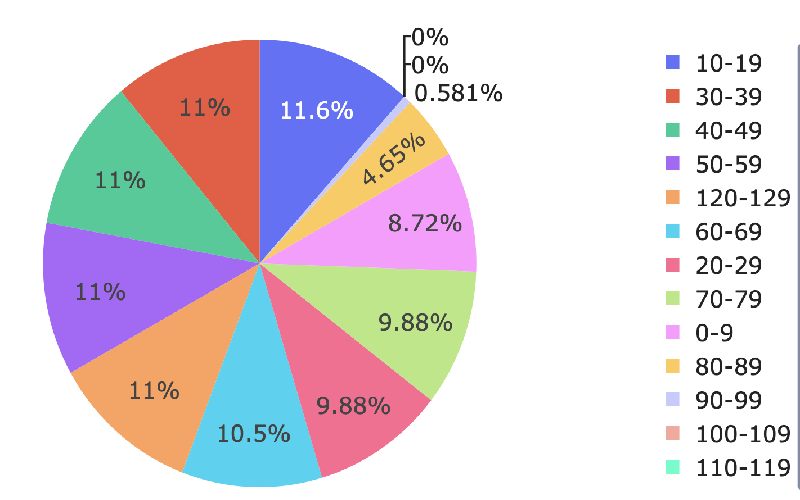

In [67]:
# fig = px.pie( values=age_data.groupby(['range_age']).size().values,names=age_data.groupby(['range_age']).size().index)
# fig.update_layout(
#     font=dict(
#         size=20,
#         color="#242323"
#     )
#     )   
    
#py.iplot(fig)
im = PIL.Image.open("images/age_pie.png")
display(im.resize((800,500), 0))


## About gender

Text(0.5, 1.0, 'Confirmed cases from 02/03 -> 22/03')

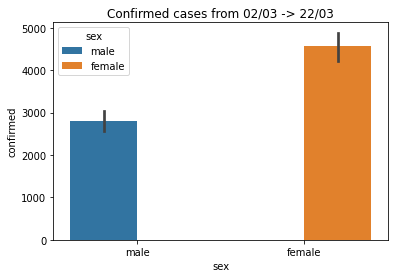

In [59]:
sns.barplot(x="sex", y="confirmed", hue="sex", data=gender).set_title('Confirmed cases from 02/03 -> 22/03')

<h1><center>Chest X-Ray COVID-19 Classification</center></h1>

Before get to work into this field, I want to talk about some problem. Firstly, this is my research on X-Ray chest, and I just use my own available knowledge to apply. So if you have any confuses or complains please give a feedback to me at [my facebook](https://www.facebook.com/martin.hoang.142) ^^. Thank you and have fun !

- You can find the dataset in [this link](https://data.mendeley.com/datasets/2fxz4px6d8/4#folder-2eec69c7-9b6c-4864-b9d5-bd059e2dd24b), this dataset is already use augmentation techniques !
- The organization of folder as below:

    + Dataset_COVID-19_Augmented (root)
    
        <p>~ Images with COVID-19: COVID-19 (child folder)</p>
        <p>~ Images with NON-COVID-19: Non-COVID-19 (child folder)</p>

## Take a look at some differences between COVID-19's chest x-ray and NON-COVID-19's chest x-ray

In [36]:
#path
images_path = '/Users/huynh/OCR/covid-19/Dataset_COVID-19_Augmented'
covid19_path = os.path.join(images_path, 'COVID-19')
non_covid19_path = os.path.join(images_path, 'Non-COVID-19')

covid19 = []
non_covid19 = []

#load data
for i in os.listdir(os.path.join(images_path, 'COVID-19')):
    covid19.append(i)

for i in os.listdir(os.path.join(images_path, 'Non-COVID-19')):
    non_covid19.append(i)
    
print(f'Total images: {len(covid19) + len(non_covid19)}')

Total images: 1806


### COVID-19 images

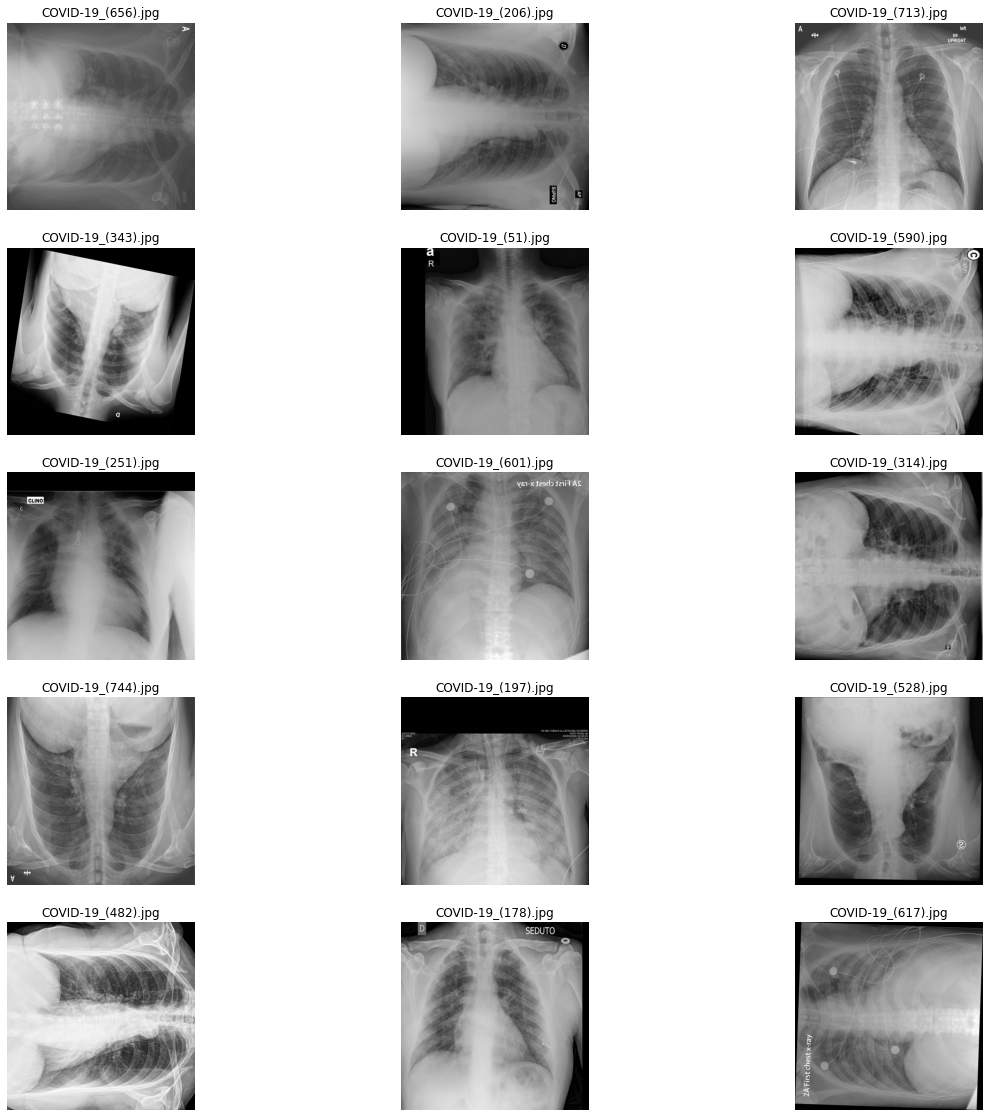

In [37]:
fig=plt.figure(figsize=(20, 20))
columns = 3
rows = 5
for i, j in enumerate(covid19[:15]):
    img = cv2.imread(os.path.join(covid19_path, j))
    fig.add_subplot(rows, columns, i+1)
    plt.title(j)
    plt.axis('off')
    plt.imshow(img)
plt.show()

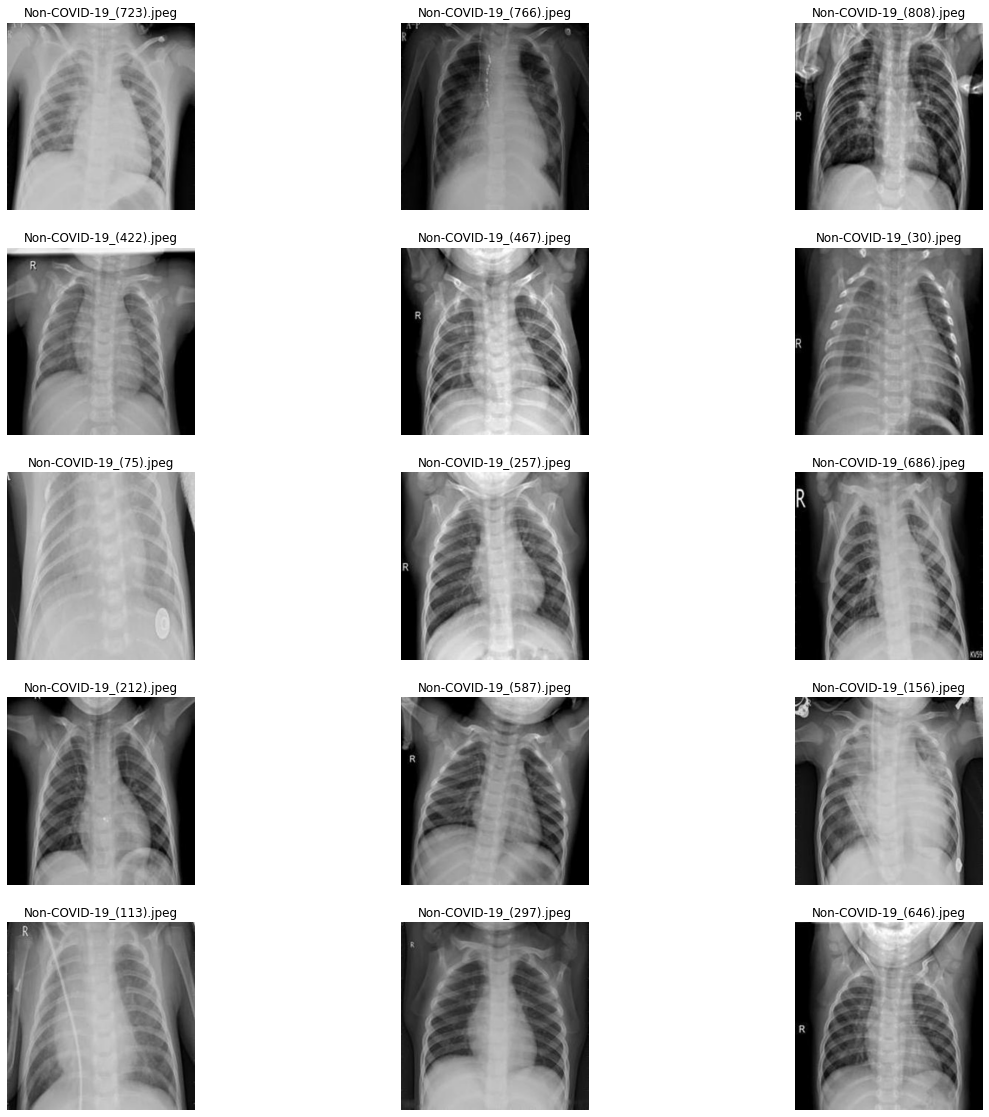

In [38]:
fig=plt.figure(figsize=(20, 20))
columns = 3
rows = 5
for i, j in enumerate(non_covid19[:15]):
    img = cv2.imread(os.path.join(non_covid19_path, j))
    fig.add_subplot(rows, columns, i+1)
    plt.title(j)
    plt.axis('off')
    plt.imshow(img)
plt.show()

### More images about the differences

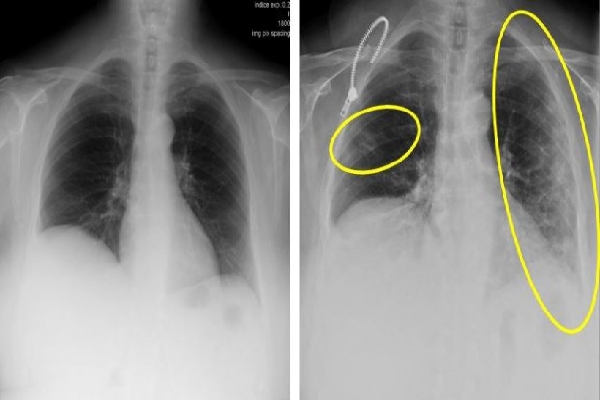

In [14]:
im = PIL.Image.open("images/img_01.jpg")
display(im.resize((600,400), 0))

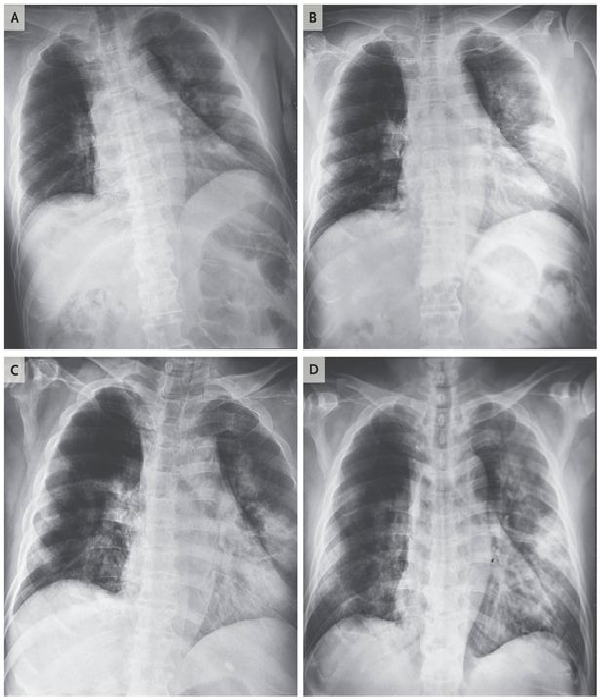

In [17]:
im = PIL.Image.open("images/0_Coronavirus-Chest-Xray.jpg")
display(im.resize((600,700), 0))

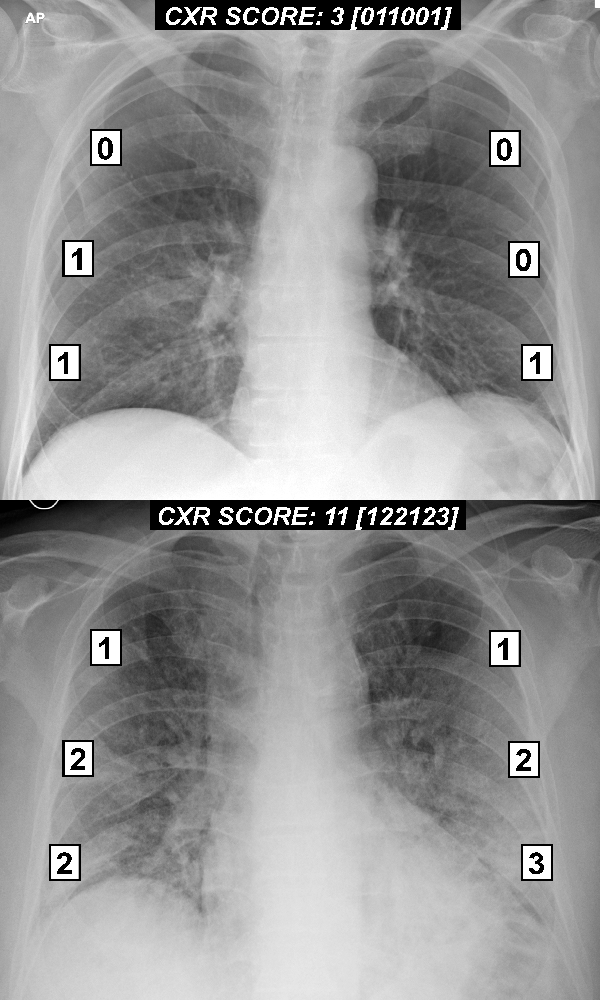

In [20]:
im = PIL.Image.open("images/Fig 2.tif")
display(im.resize((600,1000), 0))

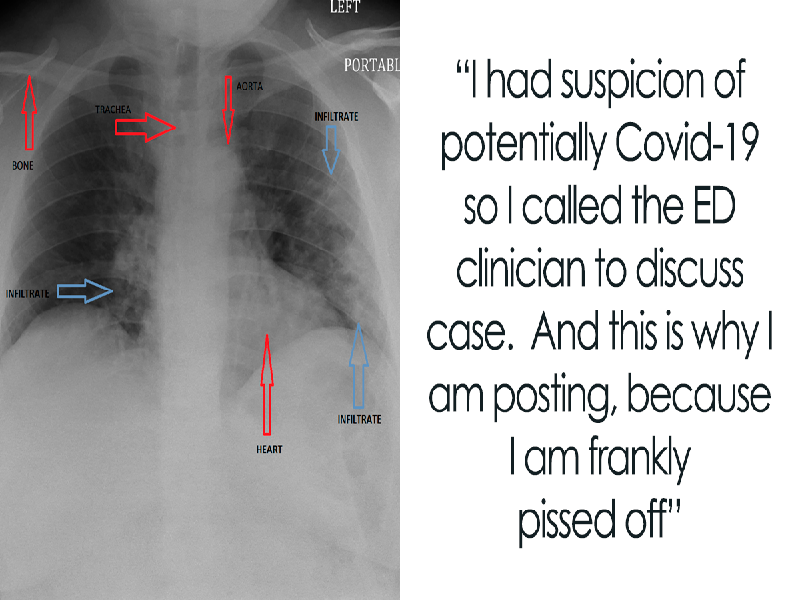

In [23]:
im = PIL.Image.open("images/covid-19-radiologist-perspective-chest-x-ray-fb23.png")
display(im.resize((800,600), 0))

About some images shown above, we can see that the lungs have COV-19 are quite more blur than the normal lung X-ray. According to [this article](https://www.verywellhealth.com/chest-x-rays-for-lung-cancer-diagnosis-4107046), with the purpose of diagnose cancer chest X-ray still have a series of several questions. "The quick answer is that more than 20% of lung cancers may be missed on a chest X-ray" but with the system of AI tools nowadays, the computer can diagnose are gradually more accuarate than people. So I decided to try to build a model classify COV-19 images.

In [2]:
#import libary
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from imutils import paths

np.random.seed(38)

In [10]:
#initialize some variables
lr = 1e-3
epochs = 5
batch_size = 8

In [53]:
img_data = list(paths.list_images(images_path))
data = []
labels = []

In [55]:
for img in img_data:
    label = img.split(os.path.sep)[-2]
    image = cv2.imread(img)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (224, 224))
    
    data.append(image)
    labels.append(label)

#scale image
data = np.array(data) / 255.0
labels = np.array(labels)

#create one-hot encoding
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
labels = to_categorical(labels)

In [56]:
(x_train, x_test, y_train, y_test) = train_test_split(data, labels, test_size=0.2, stratify=labels, random_state=42)

In [57]:
data_generator = ImageDataGenerator(
    horizontal_flip=True,
    fill_mode='neareast')

In [59]:
#load VGG16 pretrain model
vgg16_model = VGG16(weights='imagenet', include_top=False, input_tensor=Input(shape=(224,224,3)))

#build output model
model = vgg16_model.output
model = AveragePooling2D(pool_size=(2,2))(model)
model = Flatten()(model)
model = Dense(128, activation='relu')(model)
model = Dropout(0.2)(model)
model = Dense(256, activation='relu')(model)
model = Dropout(0.2)(model)
model = Dense(512, activation='relu')(model)
model = Dropout(0.2)(model)
model = Dense(2, activation='softmax')(model)

model = Model(inputs=vgg16_model.input, outputs=model)

#freeze top layers VGG16 layers
for layer in vgg16_model.layers:
    layer.trainable = False
    
optimize = Adam(lr=lr, decay=lr/epochs)
model.compile(loss='binary_crossentropy', optimizer=optimize, metrics=['accuracy'])

history = model.fit_generator(
    data_generator.flow(x_train, y_train, batch_size=batch_size),
    steps_per_epoch=len(x_train) // batch_size,
    validation_data=(x_test, y_test),
    validation_steps=len(x_test) // batch_size,
    epochs=epochs)

Epoch 1/5
180/180 [==============================] - 291s 2s/step - loss: 0.1261 - acc: 0.9498 - val_loss: 0.0196 - val_acc: 0.9945
Epoch 2/5
180/180 [==============================] - 298s 2s/step - loss: 0.0551 - acc: 0.9784 - val_loss: 0.0154 - val_acc: 0.9945
Epoch 3/5
180/180 [==============================] - 299s 2s/step - loss: 0.0453 - acc: 0.9861 - val_loss: 0.0113 - val_acc: 0.9945
Epoch 4/5
180/180 [==============================] - 300s 2s/step - loss: 0.0145 - acc: 0.9951 - val_loss: 0.0210 - val_acc: 0.9945
Epoch 5/5
180/180 [==============================] - 302s 2s/step - loss: 0.0162 - acc: 0.9951 - val_loss: 0.0032 - val_acc: 1.0000


In [60]:
#predict the x_test and make a classification report
pred = model.predict(x_test, batch_size=batch_size)
pred = np.argmax(pred, axis=1)
print(classification_report(y_test.argmax(axis=1), pred, target_names=lb.classes_))

              precision    recall  f1-score   support

    COVID-19       1.00      1.00      1.00       180
Non-COVID-19       1.00      1.00      1.00       181

    accuracy                           1.00       361
   macro avg       1.00      1.00      1.00       361
weighted avg       1.00      1.00      1.00       361



In [61]:
#create confusion matrix and compute the accuracy oof the model
confusion_matrix = confusion_matrix(y_test.argmax(axis=1), pred)
total = sum(sum(confusion_matrix))
acc = (confusion_matrix[0, 0] + confusion_matrix[1, 1]) / total

print(confusion_matrix)
print('Accuracy: {:.4f}'.format(acc))

[[180   0]
 [  0 181]]
Accuracy: 1.0000


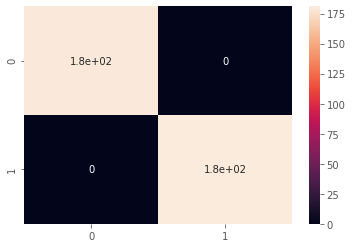

In [78]:
sns.heatmap(confusion_matrix, annot=True)

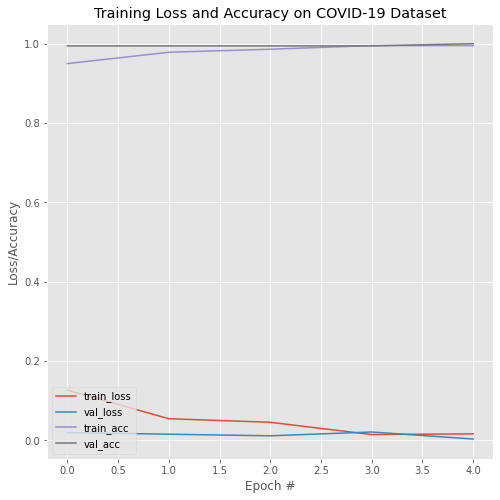

In [62]:
N = epochs
plt.style.use("ggplot")
plt.figure(figsize=(8,8))
plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), history.history["acc"], label="train_acc")
plt.plot(np.arange(0, N), history.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy on COVID-19 Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
# plt.savefig('.')

- With the weights of VGG16 model we can see that the model converge really fast and get the high accuracy about 98.6%

In [63]:
model.save('./model/covid19.h5', model)

### Let's predict some test images

In [3]:
#load model
covid_model = load_model('./model/covid19.h5')
test_path = list(paths.list_images('test/'))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [6]:
test_data = []
test_labelss = []

for img in test_path:
    label = img.split(os.path.sep)[-1].split('_')[0]
    image = cv2.imread(img)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (224, 224))
    
    test_data.append(image)
    test_labelss.append(label)

test_labels = lb.fit_transform(test_labelss)
test_labels = to_categorical(test_labels)
test_labels = np.argmax(test_labels, axis=1)

In [11]:
pred_labels = covid_model.predict(np.array(test_data), batch_size=batch_size)
pred_labels = np.argmax(pred_labels, axis=1)

In [12]:
print(f'Labels: {test_labels}')
print(f'Predict labels: {pred_labels}')

Labels: [1 1 1 1 1 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0]
Predict labels: [1 1 1 1 1 1 0 1 1 1 0 1 0 0 0 0 1 1 1 1]


In [13]:
import sklearn
acc = sklearn.metrics.accuracy_score(test_labels, pred_labels)
print(f'Accuracy: {round(acc, 2) * 100}%')

Accuracy: 80.0%


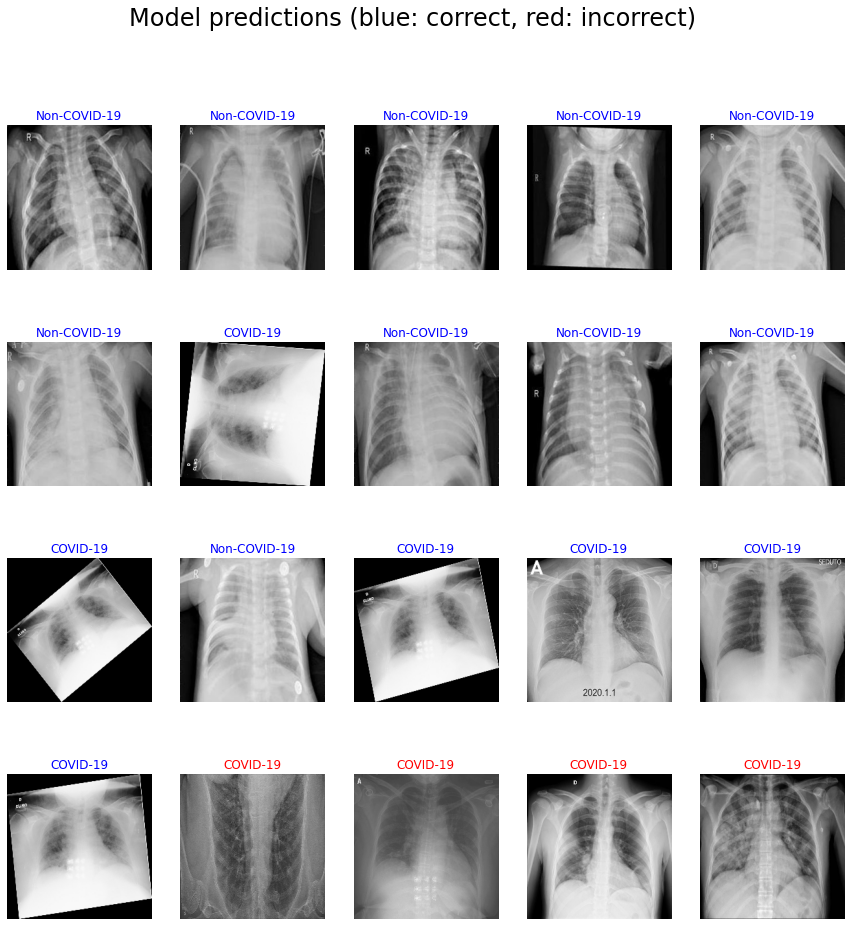

In [17]:
path = '/Users/huynh/OCR/covid-19/'

plt.figure(figsize=(15,15))
for n in range(20):
    plt.subplot(4,5,n+1)
    plt.subplots_adjust(hspace = 0.3, wspace=0.2)
    plt.imshow(test_data[n])
    color = "blue" if pred_labels[n] == test_labels[n] else "red"
    plt.title(test_labelss[n], color=color)
    plt.axis('off')
_ = plt.suptitle("Model predictions (blue: correct, red: incorrect)", fontsize=24)

Hope you enjoy it, Thank you !
<p>Author: HuyNg.</p>